In [2]:
#Importing Libraries

import pandas as pd
import numpy as np
import datetime as dt
from tensorflow.keras.models import Sequential 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
df = pd.read_csv("TTWO.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-04-15,3.666667,3.916667,3.416667,3.916667,3.916425,1785600
1,1997-04-16,3.916667,4.166667,3.583333,3.708333,3.708104,443700
2,1997-04-17,3.750000,4.083333,3.750000,3.833333,3.833096,252150
3,1997-04-18,3.833333,4.000000,3.833333,4.000000,3.999753,165900
4,1997-04-21,3.916667,4.000000,3.916667,4.000000,3.999753,77400
...,...,...,...,...,...,...,...
6685,2023-11-06,139.000000,139.169998,132.169998,134.369995,134.369995,1926700
6686,2023-11-07,135.679993,137.279999,135.000000,136.360001,136.360001,1881700
6687,2023-11-08,148.210007,148.639999,143.130005,143.470001,143.470001,8062400
6688,2023-11-09,148.630005,149.919998,144.259995,146.320007,146.320007,4612600


In [5]:
df = df[['Date','Close']]
df.head()

,Date,Close
0,1997-04-15,3.916667
1,1997-04-16,3.708333
2,1997-04-17,3.833333
3,1997-04-18,4.000000
4,1997-04-21,4.000000


In [6]:
df['Date']

0       1997-04-15
1       1997-04-16
2       1997-04-17
3       1997-04-18
4       1997-04-21
           ...    
6685    2023-11-06
6686    2023-11-07
6687    2023-11-08
6688    2023-11-09
6689    2023-11-10
Name: Date, Length: 6690, dtype: object

In [7]:
def str_to_dt(d):
    split = d.split('-')
    year, month, day = int(split[0]),int(split[1]), int(split[2])
    return dt.datetime(year=year,month=month,day=day)

In [8]:
df['Date'] = df['Date'].apply(str_to_dt)
df['Date']

C:\Users\shubh\AppData\Local\Temp\ipykernel_2084\3336762529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_dt)


0      1997-04-15
1      1997-04-16
2      1997-04-17
3      1997-04-18
4      1997-04-21
          ...    
6685   2023-11-06
6686   2023-11-07
6687   2023-11-08
6688   2023-11-09
6689   2023-11-10
Name: Date, Length: 6690, dtype: datetime64[ns]

In [9]:
df.index = df.pop('Date')

In [10]:
df

,Close
Date,
1997-04-15,3.916667
1997-04-16,3.708333
1997-04-17,3.833333
1997-04-18,4.000000
1997-04-21,4.000000
...,...
2023-11-06,134.369995
2023-11-07,136.360001
2023-11-08,143.470001


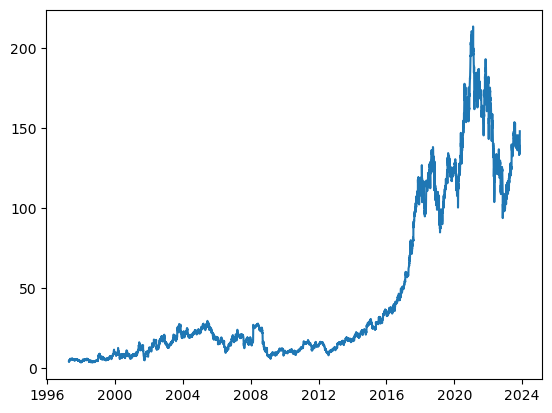

In [11]:
plt.plot(df.index, df['Close'])

In [12]:


def windowed_df(dataframe):
    past_days = 3
    windowed_df = pd.DataFrame()
    dataframe = dataframe.reset_index()
    windowed_df['Target date'] = dataframe['Date']
    
    for i in range(past_days, 0, -1):
        windowed_df[f'Target {i}'] = dataframe['Close'].shift(i)
        
    windowed_df['Target'] = dataframe['Close']
    windowed_df = windowed_df.dropna()

    return windowed_df

print(windowed_df(df))



     Target date    Target 3    Target 2    Target 1      Target
3     1997-04-18    3.916667    3.708333    3.833333    4.000000
4     1997-04-21    3.708333    3.833333    4.000000    4.000000
5     1997-04-22    3.833333    4.000000    4.000000    3.916667
6     1997-04-23    4.000000    4.000000    3.916667    4.500000
7     1997-04-24    4.000000    3.916667    4.500000    4.833333
...          ...         ...         ...         ...         ...
6685  2023-11-06  133.809998  137.500000  138.910004  134.369995
6686  2023-11-07  137.500000  138.910004  134.369995  136.360001
6687  2023-11-08  138.910004  134.369995  136.360001  143.470001
6688  2023-11-09  134.369995  136.360001  143.470001  146.320007
6689  2023-11-10  136.360001  143.470001  146.320007  147.880005

[6687 rows x 5 columns]


In [13]:
def df_windowed_to_np(w_dataframe):
    df_to_np = w_dataframe.to_numpy()
    
    dates = df_to_np[:,0]
    
    middle_matrix = df_to_np[:,1:-1]
    X = middle_matrix.reshape(len(dates), middle_matrix.shape[1],1)
    
    Y = df_to_np[:, -1]
    
    return dates, X.astype(np.float32), Y.astype(np.float32)

In [14]:
dates, X, y = df_windowed_to_np(windowed_df(df))
print(dates.shape)
print(X.shape)
print(y.shape)

(6687,)
(6687, 3, 1)
(6687,)


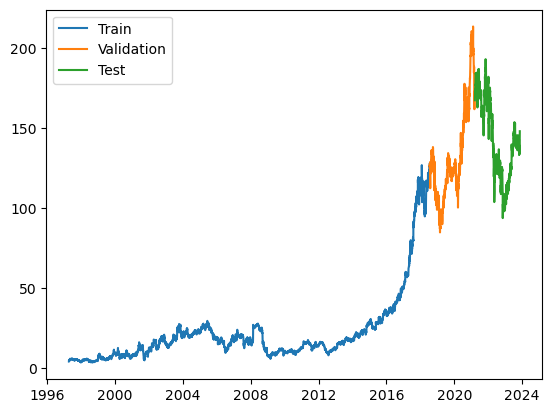

In [18]:
#Splitting the numpy arrays into train, test and validation datasets 

q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])
plt.show()

In [19]:
model = Sequential([layers.Input((3,1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)
                   ])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train,y_train, validation_data=(X_val,y_val), epochs=100)

Epoch 1/100
168/168 [==============================] - 3s 6ms/step - loss: 432.6463 - mean_absolute_error: 9.7715 - val_loss: 1799.5663 - val_mean_absolute_error: 31.9539
Epoch 2/100
168/168 [==============================] - 1s 4ms/step - loss: 1.8755 - mean_absolute_error: 0.6964 - val_loss: 954.3058 - val_mean_absolute_error: 19.3967
Epoch 3/100
168/168 [==============================] - 1s 3ms/step - loss: 0.8894 - mean_absolute_error: 0.5414 - val_loss: 831.3177 - val_mean_absolute_error: 17.2987
Epoch 4/100
168/168 [==============================] - 1s 4ms/step - loss: 0.8057 - mean_absolute_error: 0.5166 - val_loss: 767.9007 - val_mean_absolute_error: 16.3271
Epoch 5/100
168/168 [==============================] - 1s 3ms/step - loss: 0.9079 - mean_absolute_error: 0.5591 - val_loss: 750.2415 - val_mean_absolute_error: 16.2082
Epoch 6/100
168/168 [==============================] - 1s 4ms/step - loss: 1.0329 - mean_absolute_error: 0.5878 - val_loss: 771.3572 - val_mean_absolute_erro

168/168 [==============================] - 1s 4ms/step - loss: 0.7517 - mean_absolute_error: 0.5069 - val_loss: 643.5311 - val_mean_absolute_error: 14.9895
Epoch 50/100
168/168 [==============================] - 1s 4ms/step - loss: 0.8016 - mean_absolute_error: 0.5288 - val_loss: 548.7017 - val_mean_absolute_error: 13.2739
Epoch 51/100
168/168 [==============================] - 1s 4ms/step - loss: 0.7225 - mean_absolute_error: 0.5030 - val_loss: 588.9241 - val_mean_absolute_error: 13.8377
Epoch 52/100
168/168 [==============================] - 1s 4ms/step - loss: 0.6785 - mean_absolute_error: 0.4797 - val_loss: 533.5825 - val_mean_absolute_error: 12.8938
Epoch 53/100
168/168 [==============================] - 1s 4ms/step - loss: 0.7839 - mean_absolute_error: 0.5397 - val_loss: 550.2915 - val_mean_absolute_error: 13.2823
Epoch 54/100
168/168 [==============================] - 1s 4ms/step - loss: 0.6895 - mean_absolute_error: 0.4899 - val_loss: 535.7988 - val_mean_absolute_error: 12.9507

168/168 [==============================] - 1s 4ms/step - loss: 0.7386 - mean_absolute_error: 0.4957 - val_loss: 528.1074 - val_mean_absolute_error: 13.0197
Epoch 98/100
168/168 [==============================] - 1s 4ms/step - loss: 0.7459 - mean_absolute_error: 0.5088 - val_loss: 523.9960 - val_mean_absolute_error: 12.9943
Epoch 99/100
168/168 [==============================] - 1s 3ms/step - loss: 0.6794 - mean_absolute_error: 0.4719 - val_loss: 530.8160 - val_mean_absolute_error: 13.5086
Epoch 100/100
168/168 [==============================] - 1s 3ms/step - loss: 0.7808 - mean_absolute_error: 0.5007 - val_loss: 509.4291 - val_mean_absolute_error: 12.6403


168/168 [==============================] - 1s 2ms/step


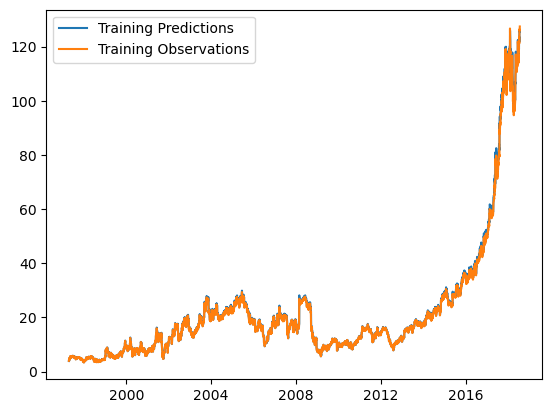

In [20]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

21/21 [==============================] - 0s 2ms/step


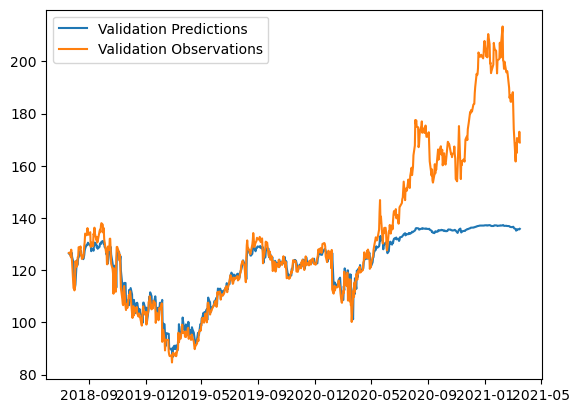

In [21]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

21/21 [==============================] - 0s 1ms/step


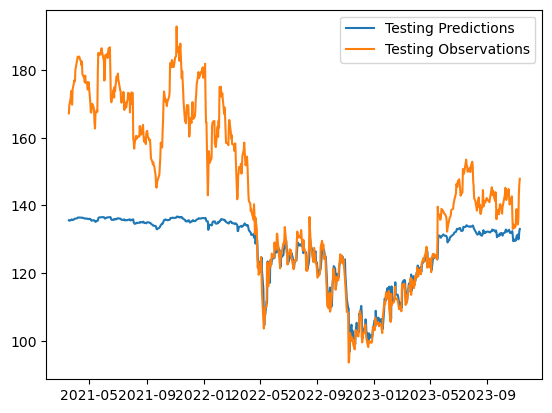

In [22]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

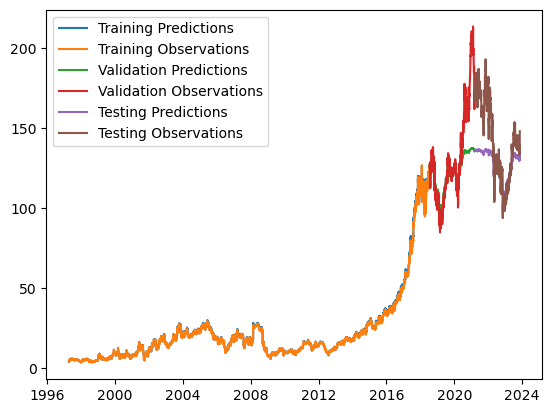

In [23]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])